In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
%matplotlib inline

### 1. Import the GIP EUR Data Set from the provided ‘GIP_EUR_DataSet.xlsx’ file and
### perform the following (6 points):
### a. Apply standard scaling on the data using the sklearn library.
### b. Plot the dendogram for this dataset using the sklearn library. Draw a horizontal plot at distance = 4.
### c. Apply the hierarchical clustering algorithm using the sklearn library with number of clusters = 8.
### d. Plot the variation of silhouette coefficients with clusters clearly indicating the
### average silhouette coefficient for all the clusters.
### e. Convert the dataset to the original scale and export the data as a .csv file.

In [2]:
df = pd.read_excel('GIP_EUR_DataSet.xlsx')
df.describe()

,GIP (BCFperSection),EURper1000ft
count,200.00000,200.000000
mean,199.84800,2.201754
std,86.67358,1.132611
min,49.50000,0.043860
25%,136.95000,1.524123
50%,202.95000,2.192982
75%,257.40000,3.201754
max,452.10000,4.342105


In [3]:
### a. Apply standard scaling on the data using the sklearn library.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)

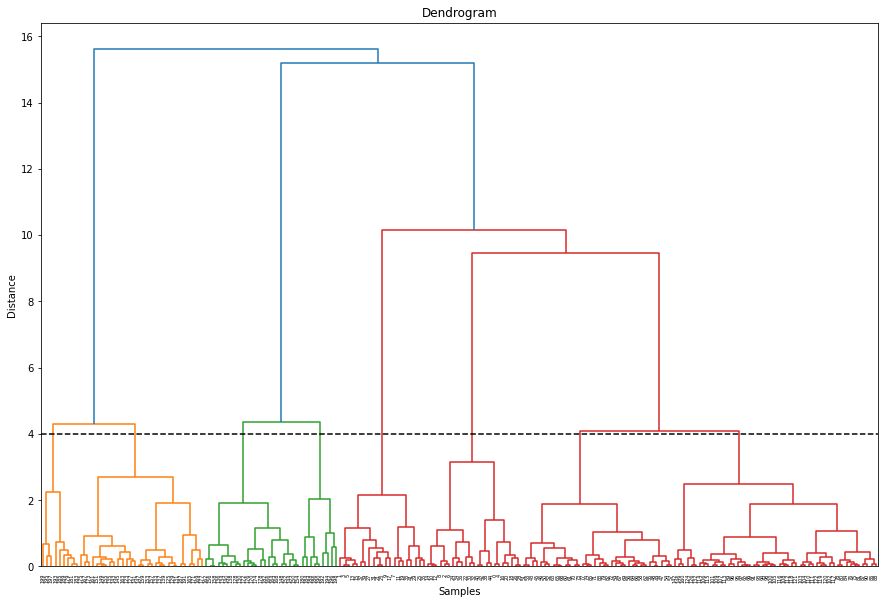

In [4]:
### b. Plot the dendogram for this dataset using the sklearn library. Draw a horizontal plot at distance = 4.

import scipy.cluster.hierarchy as shc   
plt.figure(figsize=(15, 10))
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title("Dendrogram") 
plt.axhline(y=4, color='k', linestyle='--')

In [5]:
### c. Apply the hierarchical clustering algorithm using the sklearn library with number of clusters = 8.

from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
HC=HC.fit_predict(df_scaled)
HC

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 7,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 7, 1, 7, 1, 1, 7, 7, 1, 7, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 5, 2, 5, 2,
       1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 6, 4, 6, 5, 6, 4, 6, 4, 2, 4, 6, 4, 2, 4, 6, 4, 6, 4, 6,
       4, 6], dtype=int64)

In [6]:
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:2])
df_scaled['Cluster']=HC
df_scaled

,GIP (BCFperSection),EURper1000ft,Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,6
196,2.497807,-0.861839,4
197,2.497807,0.923953,6
198,2.917671,-1.250054,4


Text(0.5, 0, 'silhouette coefficient')

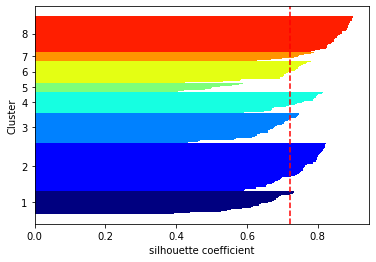

In [7]:
### d. Plot the variation of silhouette coefficients with clusters clearly indicating the average 
### silhouette coefficient for all the clusters.

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(HC)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,HC,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[HC==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')

In [8]:
df.columns

Index(['GIP (BCFperSection)', 'EURper1000ft'], dtype='object')

In [9]:
### e. Convert the dataset to the original scale and export the data as a .csv file.

df_scaled['GIP (BCFperSection)']=(df_scaled['GIP (BCFperSection)']*(df['GIP (BCFperSection)'].std())+df['GIP (BCFperSection)'].mean())
df_scaled['EURper1000ft']=(df_scaled['EURper1000ft']*(df['EURper1000ft'].std())+df['EURper1000ft'].mean())



In [10]:
df_scaled.to_csv('HC.csv')

In [11]:
Group_by=df_scaled.groupby(by='Cluster').mean()
Group_by

,GIP (BCFperSection),EURper1000ft
Cluster,,
0,86.520674,0.914015
1,207.042499,2.105918
2,262.947948,3.556021
3,82.520600,3.514146
4,366.717697,0.996007
5,267.325427,0.556522
6,361.939069,3.770985
7,152.965981,2.221052


In [12]:
df_scaled.groupby(by='Cluster').count()

,GIP (BCFperSection),EURper1000ft
Cluster,,
0,23,23
1,49,49
2,30,30
3,21,21
4,9,9
5,23,23
6,9,9
7,36,36


In [13]:
df_scaled.to_csv('HC2.csv')

### 2. Import the PE Income Spending Data Set from the provided 'PE_Income_Spending_DataSet.csv file and perform the following (4 points):
### a. Apply the isolation forest algorithm using the sklearn library to detect outliers with contamination parameter = 0.3, 0.5, 0.7, and 0.9.
### b. Plot a histogram of average anomaly score for each contamination parameter.
### c. Generate a scatter plot of spending habits vs. income for each contamination parameter and clearly identify the outlier data.

In [14]:
df=pd.read_csv('PE_Income_Spending_DataSet.csv')

In [15]:
df=pd.get_dummies(df,drop_first=True)
df

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,1
1,21,34.676354,76.95,1
2,20,36.988111,5.70,0
3,23,36.988111,73.15,0
4,31,39.299868,38.00,0
...,...,...,...,...
195,35,277.410832,75.05,0
196,45,291.281374,26.60,0
197,32,291.281374,70.30,1
198,32,316.710700,17.10,1


In [16]:
### a. Apply the isolation forest algorithm using the sklearn library to 
### detect outliers with contamination parameter = 0.3, 0.5, 0.7, and 0.9.

from sklearn.ensemble import IsolationForest
clf1 = IsolationForest(n_estimators=100,max_samples=250,random_state=100, contamination=0.3) 
clf1.fit(df)


C:\Users\rajak\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:285: UserWarning: max_samples (250) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


IsolationForest(contamination=0.3, max_samples=250, random_state=100)

In [17]:
df['Scores']=clf1.decision_function(df)

Text(0.5, 1.0, 'Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

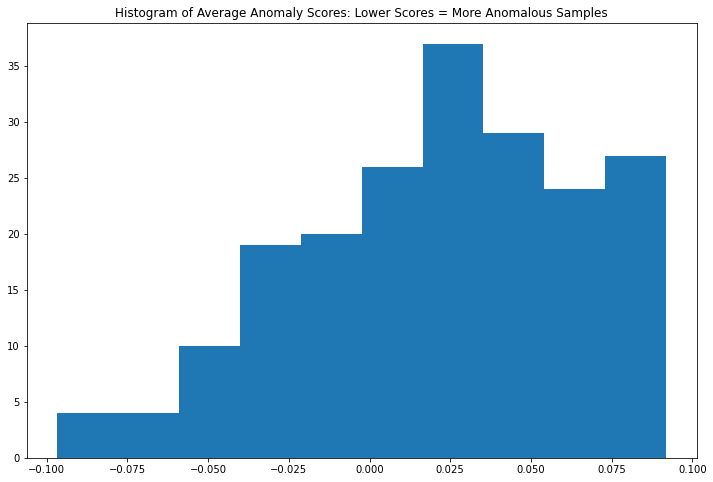

In [18]:
### b. Plot a histogram of average anomaly score for each contamination parameter.

plt.figure(figsize=(12,8))
plt.hist(df['Scores'])
plt.title('Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

In [19]:
### c. Generate a scatter plot of spending habits vs. income 
### for each contamination parameter and clearly identify the outlier data.

df['Anomaly']=clf1.predict(df.iloc[:,:4])
Anomaly=df.loc[df['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
#Anomaly

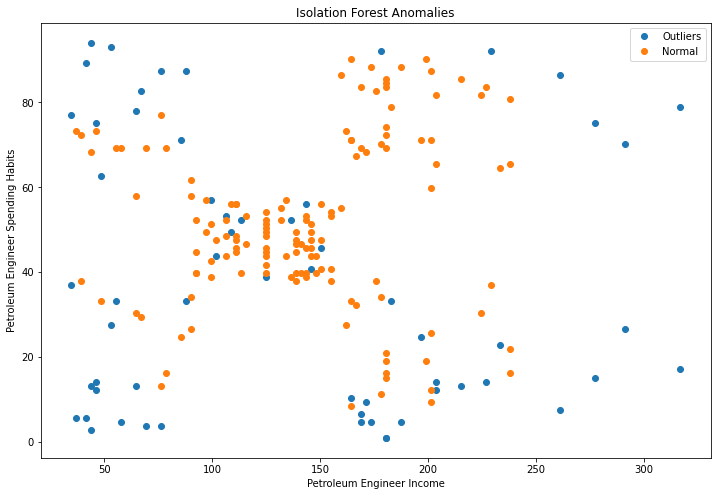

In [20]:
plt.figure(figsize=(12,8))
groups = df.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Isolation Forest Anomalies') 
plt.legend(["Outliers","Normal"])

In [21]:
clf2 = IsolationForest(n_estimators=100,max_samples=250,random_state=100, contamination=0.5) 
clf2.fit(df)

C:\Users\rajak\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:285: UserWarning: max_samples (250) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


IsolationForest(contamination=0.5, max_samples=250, random_state=100)

In [22]:
df['Scores']=clf2.decision_function(df)

Text(0.5, 1.0, 'Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

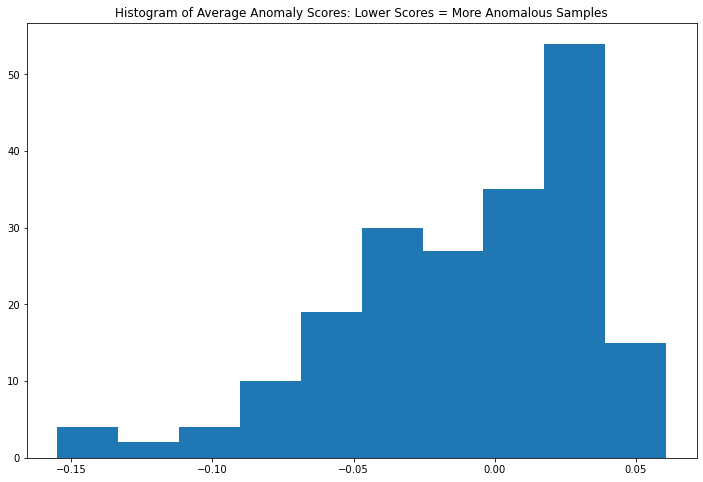

In [23]:
plt.figure(figsize=(12,8))
plt.hist(df['Scores'])
plt.title('Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

In [24]:
df['Anomaly']=clf2.predict(df)
Anomaly=df.loc[df['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
#Anomaly

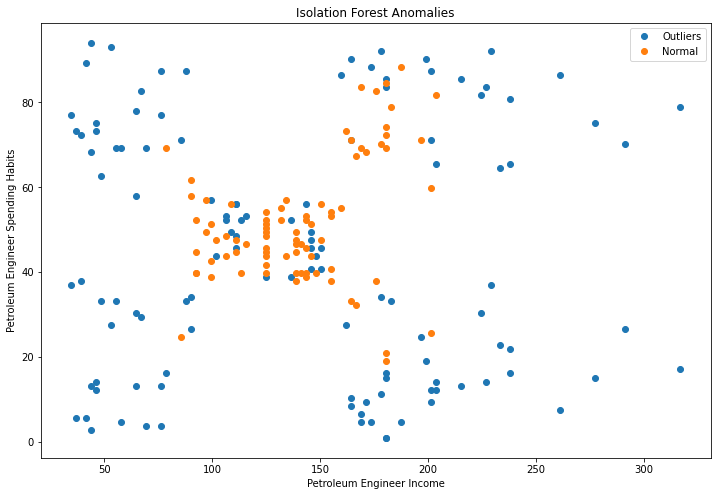

In [25]:
plt.figure(figsize=(12,8))
groups = df.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Isolation Forest Anomalies') 
plt.legend(["Outliers","Normal"])

In [26]:
clf3 = IsolationForest(n_estimators=100,max_samples=250,random_state=100, contamination=0.7) 
clf3.fit(df)


C:\Users\rajak\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:285: UserWarning: max_samples (250) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


IsolationForest(contamination=0.7, max_samples=250, random_state=100)

In [27]:
df['Scores']=clf3.decision_function(df)

Text(0.5, 1.0, 'Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

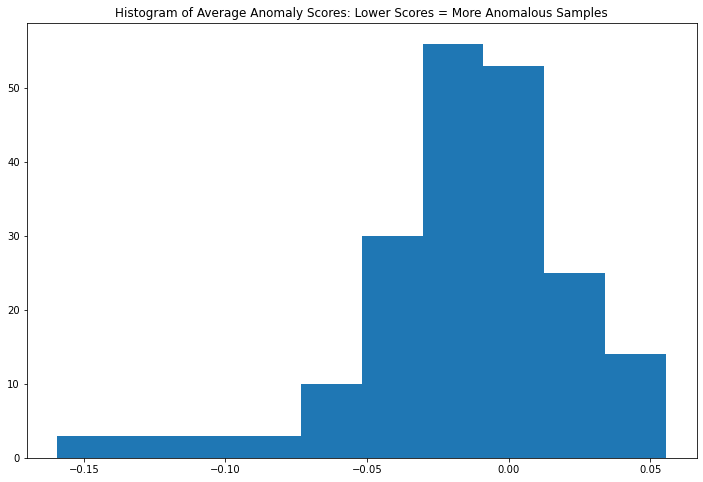

In [28]:
plt.figure(figsize=(12,8))
plt.hist(df['Scores'])
plt.title('Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

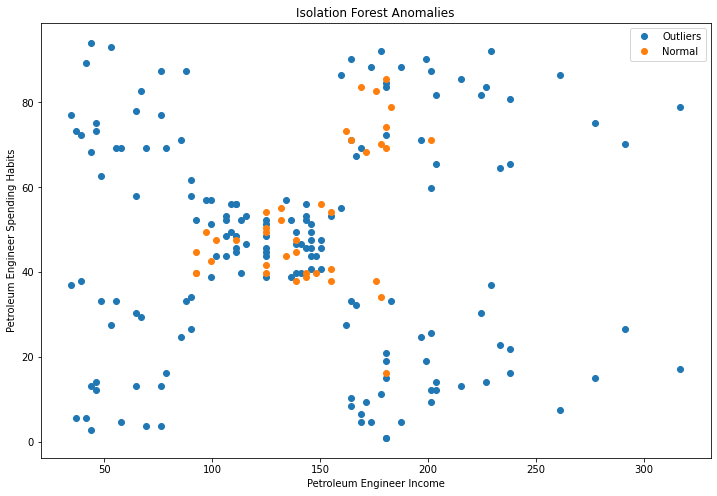

In [29]:
df['Anomaly']=clf3.predict(df)
Anomaly=df.loc[df['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
Anomaly

plt.figure(figsize=(12,8))
groups = df.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Isolation Forest Anomalies') 
plt.legend(["Outliers","Normal"])

In [30]:
clf4 = IsolationForest(n_estimators=100,max_samples=250,random_state=100, contamination=0.9) 
clf4.fit(df)

C:\Users\rajak\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:285: UserWarning: max_samples (250) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


IsolationForest(contamination=0.9, max_samples=250, random_state=100)

In [31]:
df['Scores']=clf4.decision_function(df)

Text(0.5, 1.0, 'Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

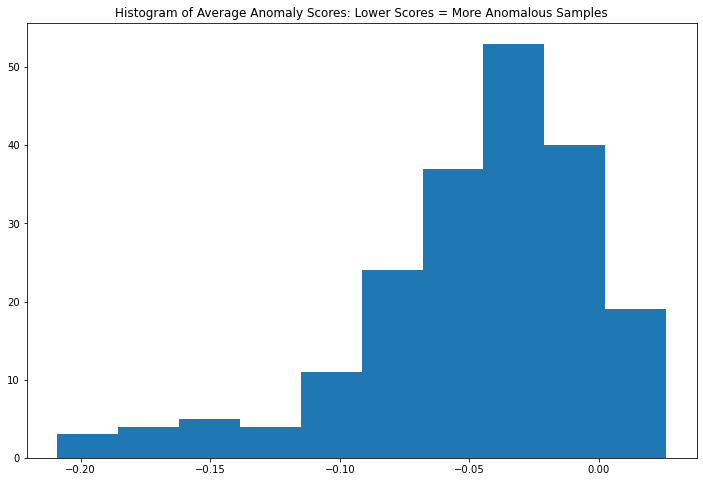

In [32]:
plt.figure(figsize=(12,8))
plt.hist(df['Scores'])
plt.title('Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

In [33]:
df['Anomaly']=clf4.predict(df)
Anomaly=df.loc[df['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
#Anomaly

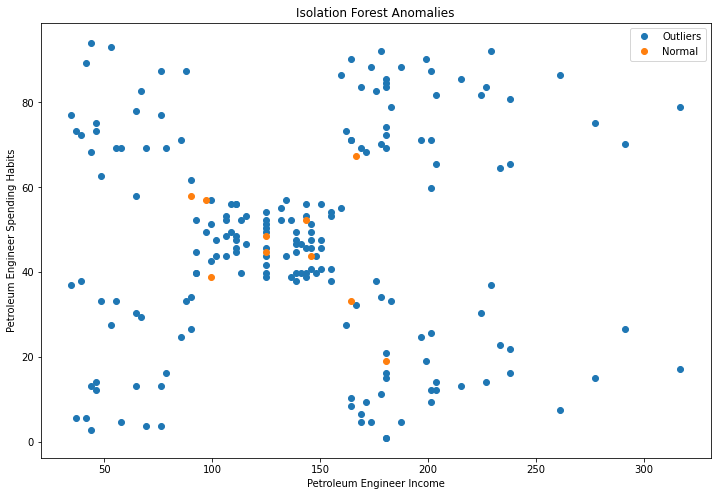

In [34]:
plt.figure(figsize=(12,8))
groups = df.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Isolation Forest Anomalies') 
plt.legend(["Outliers","Normal"])